<div style="color: green; font-weight:bold">
Your solution is pretty much equal to the sample solution.
</div>

# Ex5 Regularized Regression

## 1 Bias and variance of ridge regression

$$
\hat\beta=\arg\min_\beta(y-X\beta)^T(y-X\beta)+\tau\beta^T\beta
$$

### Minimizing the objective

Expanding the objective we get
$$
\begin{aligned}
& (y-X\beta)^T(y-X\beta)+\tau\beta^T\beta\\
& = y^Ty-\beta^TX^Ty-y^TX\beta-\beta^TX^T\beta X+\tau\beta^T\beta:=\mathcal L
\end{aligned}
$$
Setting F.O.C. to zero
$$
\frac{\part\mathcal L}{\part\beta}=0-2X^Ty+2X^TX\beta+2\tau\beta
$$
gets us the solution
$$
\begin{aligned}
\hat\beta&=(X^T X + \tau \mathbb{I}_D)^{-1} X^T y\\
&=\boxed{S_\tau^{-1}X^Ty}
\end{aligned}
$$
where $S_\tau=X^T X + \tau \mathbb{I}_D$. We define also $S=S_{\tau=0}=X^TX$. Both $S_\tau,S$ clearly symmetric (property to be used later).

### Mean $\mathbb E(\hat\beta_\tau)$

Plug in $y=X\beta^*+\epsilon$, with $\epsilon\sim\mathcal N(0,\sigma^2)$
$$
\mathbb E(\hat\beta_\tau)=\mathbb E\left[S_\tau^{-1}X^T(X\beta^*+\epsilon)\right]\\
=\mathbb E\left[S_\tau^{-1}\underbrace{X^TX}_{S}\beta^*\right]+\mathbb S_\tau^{-1}X^T \cancel{E[\epsilon]}^0\\
=\boxed{S_\tau^{-1}S\beta^*}
$$

### Variance $\text{Cov}[\hat\beta_\tau]$

First, we rewrite $\hat\beta_\tau$ in terms of $\hat\beta=\hat\beta_{\tau=0}$ from OLS estimate (so that we can later reuse the result $\text{Cov}[\hat\beta_{\tau=0}]=S^{-1}\sigma^2$ as derived in class) :
$$
\begin{aligned}
\hat\beta_\tau&=S_\tau^{-1}X^Ty\\
&=S_\tau^{-1}X^T(XX^{-1})(XX^{-1})^Ty\\
&=S_\tau^{-1}X^TXX^{-1}(X^T)^{-1}X^Ty\\
&=S_\tau^{-1}X^TX(X^TX)^{-1}X^Ty\\
&=S_\tau^{-1}S\underbrace{(X^TX)^{-1}X^Ty}_{\hat\beta}\\
&=S_\tau^{-1}S\hat\beta
\end{aligned}
$$
thus
$$
\text{Cov}[\hat\beta_\tau]=\text{Cov}\left[S_\tau^{-1}S\hat\beta\right]\\
=S_\tau^{-1}S\text{Cov}\left[\hat\beta\right](S_\tau^{-1}S)^T\\
=S_\tau^{-1}SS^{-1}\sigma^2(S_\tau^{-1}S)^T\\
=S_\tau^{-1}\sigma^2S^T(S_\tau^{-1})^T\\
=\boxed{S_\tau^{-1}SS_\tau^{-1}\sigma^2}
$$
where we used the symmetricity of both scatter matrices in the last step.

<div style="color: green; font-weight:bold">
Here your solution also pretty closely follows the sample solution
</div>

## 2 LDA-Derivation from the Least Squares Error (16 points)



To derive the expression for $$\hat{\beta}_{\text{OLS}}$$, we set the derivative of the loss with respect to $$\beta\ $$ to zero:
$$
\frac{\partial}{\partial \beta} \sum_{i=1}^N (y^*_i - X_i \cdot \beta)^2 = 0
$$

Expanding and differentiating:
$$
\frac{\partial}{\partial \beta} \sum_{i=1}^N (y^*_i - X_i \cdot \beta)^2 = -2 \sum_{i=1}^N X_i^T (y^*_i - X_i \cdot \beta) = 0
$$

Rearranging terms:
$$
\sum_{i=1}^N X_i^T y^*_i = \sum_{i=1}^N X_i^T X_i \beta
$$

Thus:
$$
X^T y = X^T X \beta
$$

Here, $$ X^T y\ $$ is the sum of the input vectors weighted by their class labels, which can be written as:
$$
X^T y = \frac{N}{2} (\mu_1 - \mu_{-1})
$$

Therefore, we have:
$$
\Sigma \beta = \frac{1}{2} (\mu_1 - \mu_{-1})
$$

We can rewrite this as:
$$
\Sigma \beta + \frac{1}{4} (\mu_1 - \mu_{-1})^T (\mu_1 - \mu_{-1}) \beta = \frac{1}{2} (\mu_1 - \mu_{-1})^T
$$

Recognizing that $$(\mu_1 - \mu_{-1}) \cdot \beta = \tau'$$ for some scalar $$\tau'$$, we bring the second term on the left-hand side to the right-hand side and obtain:
$$
\Sigma \beta = \left( \frac{1}{2} - \frac{\tau'}{4} \right) (\mu_1 - \mu_{-1})^T
$$

Thus, we have:
$$
\hat{\beta}_{\text{OLS}} = \tau \Sigma^{-1} (\mu_1 - \mu_{-1})^T
$$
with $$\tau = \frac{1}{2} - \frac{\tau'}{4}$$. 




## 3 Automatic feature selection for LDA as regression

<div style="color: green; font-weight:bold">
Your implementation differs somewhat from the sample solution, however it logically does the same thing. The sample solution does look a bit more comprehensible and elegant
</div>

### 3.1 Implement Orthogonal Matching Pursuit (8 points)

In [3]:
import numpy as np
import scipy as sci
from scipy import linalg as linalg
from sklearn.datasets import load_digits
from sklearn import model_selection
from matplotlib import pyplot as plt

In [9]:
def omp_regression(X, y, T):
    r = y
    D = len(X[0])
    A = np.array([], dtype = int)
    B = np.arange(D)
    betas = []
    for i in range(T):
        x = X.copy()
        x[:, A] = 0
        j = np.argmax(np.abs(x.T @ r))
        B = np.delete(B, np.where(B == j))
        A = np.r_[A, j]
        X_act = X[:, A]
        beta = linalg.lstsq(X_act, y)[0]
        r = y - X_act @ beta
        to_in = np.zeros(D)
        to_in[A] = beta
        betas.append(to_in)
        
    return betas

With 1 Pixels the error rate is 0.273972602739726
With 2 Pixels the error rate is 0.18493150684931503
With 3 Pixels the error rate is 0.15068493150684936
With 4 Pixels the error rate is 0.08904109589041098
With 5 Pixels the error rate is 0.06849315068493156
With 6 Pixels the error rate is 0.0547945205479452
With 7 Pixels the error rate is 0.03424657534246578
With 8 Pixels the error rate is 0.04109589041095896
With 9 Pixels the error rate is 0.0273972602739726
With 10 Pixels the error rate is 0.04109589041095896
With 11 Pixels the error rate is 0.03424657534246578
With 12 Pixels the error rate is 0.0273972602739726
With 13 Pixels the error rate is 0.0273972602739726
With 14 Pixels the error rate is 0.0273972602739726
With 15 Pixels the error rate is 0.020547945205479423
With 16 Pixels the error rate is 0.020547945205479423
With 17 Pixels the error rate is 0.020547945205479423
With 18 Pixels the error rate is 0.020547945205479423
With 19 Pixels the error rate is 0.013698630136986356
With

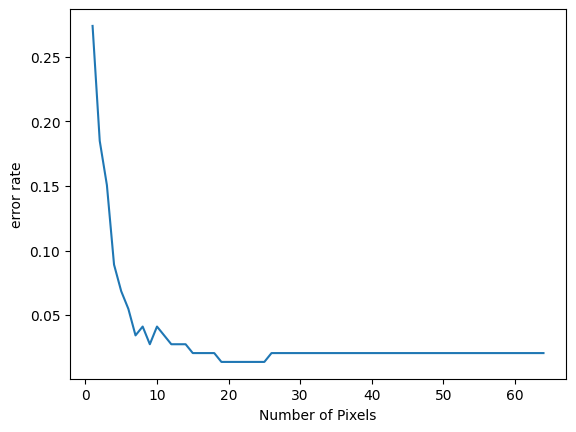

In [11]:
digits = load_digits()
data = digits["data"]
target = digits["target"]
i = np.logical_or(target == 3, target == 9)
x = data[i]
y = target[i]
y = (y == 3) * 2 - 1
N = 50
T = 64
error = np.zeros(T)

for n in range(N):

    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, random_state=n)

    betas = omp_regression(x_train, y_train, T)

    error_rates = np.array([])
    for beta in betas:
        pred = x_test @ beta
        pred = (pred >= 0) * 2 - 1
        error_rates = np.r_[error_rates, 1 - (pred == y_test).mean()]
    error += error_rates

error /= N

plt.plot(np.arange(T) + 1, error_rates)
plt.xlabel("Number of Pixels")
plt.ylabel("error rate")
for i in range(30):
    print("With", i + 1, "Pixels the error rate is", error_rates[i])

## 3.2 Classi
cation with sparse LDA (8 points)

<div style="color: green; font-weight:bold">
The core idea of your solution matches the sample solution. The sample solution however is way more elaborate and complete. The diagramms are better presented and deliver more information than in your solution.
</div>

With 1 Pixels the error rate is 0.273972602739726
With 2 Pixels the error rate is 0.18493150684931503
With 3 Pixels the error rate is 0.15068493150684936
With 4 Pixels the error rate is 0.08904109589041098
With 5 Pixels the error rate is 0.06849315068493156
With 6 Pixels the error rate is 0.0547945205479452
With 7 Pixels the error rate is 0.03424657534246578
With 8 Pixels the error rate is 0.04109589041095896
With 9 Pixels the error rate is 0.0273972602739726
With 10 Pixels the error rate is 0.04109589041095896
With 11 Pixels the error rate is 0.03424657534246578
With 12 Pixels the error rate is 0.0273972602739726
With 13 Pixels the error rate is 0.0273972602739726
With 14 Pixels the error rate is 0.0273972602739726
With 15 Pixels the error rate is 0.020547945205479423
With 16 Pixels the error rate is 0.020547945205479423
With 17 Pixels the error rate is 0.020547945205479423
With 18 Pixels the error rate is 0.020547945205479423
With 19 Pixels the error rate is 0.013698630136986356
With

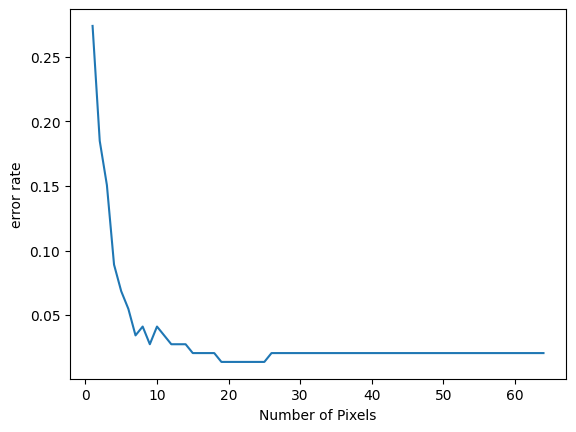

In [12]:
digits = load_digits()
data = digits["data"]
target = digits["target"]
i = np.logical_or(target == 3, target == 9)
x = data[i] / 16
y = target[i]
y = (y == 3) * 2 - 1
N = 50
T = 64
error = np.zeros(T)

for n in range(N):

    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, random_state=n)


    betas = omp_regression(x_train, y_train, T)

    pred = x_test @ beta
    pred = (pred >= 0) * 2 - 1
    (pred == y_test).mean()

    error_rates = np.array([])
    for beta in betas:
        pred = x_test @ beta
        pred = (pred >= 0) * 2 - 1
        error_rates = np.r_[error_rates, 1 - (pred == y_test).mean()]
    error += error_rates

error /= N

plt.plot(np.arange(T) + 1, error_rates)
plt.xlabel("Number of Pixels")
plt.ylabel("error rate")
for i in range(30):
    print("With", i + 1, "Pixels the error rate is", error_rates[i])

<h3> With only 4 Pixels we get an error of only 3.4%, but normalizing the data doesn't really increase accuracy

<h3> If a Value at a pixel is positive it is in favour of 3 and vice versa

In [13]:
digits = load_digits()
data = digits["data"]
target = digits["target"]
i = np.logical_or(target == 3, target == 9)
x = data[i] / 16
y = target[i]
y = (y == 3) * 2 - 1
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, random_state=0)
betas = omp_regression(x_train, y_train, T)

Pink shows favouring 9 pixel. The darker the color the stronger is the favour


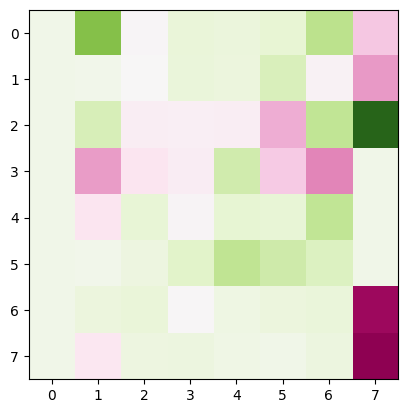

In [14]:
im = betas[-1]
im = im.reshape((8, 8))
plt.imshow(im, cmap="PiYG")
print("Pink shows favouring 9 pixel. The darker the color the stronger is the favour")

<h3> the order in which the pixels are added is

In [ ]:
A

array([18, 36, 26, 20, 29, 53,  5, 46, 21, 19, 28, 44, 27, 50, 37, 13, 30,
       10, 58, 25,  9,  6, 45, 42, 12,  4, 17, 38, 35, 54, 22, 43, 51, 11,
       34, 14, 62,  3,  2,  1, 55, 60, 59, 52, 49, 61, 57, 23, 63, 15, 41,
       33,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])